In [1]:
# This notebook can view bar plots of different initials, finals, 
# and tones between src language and dst language; modify the below
# CONSTANTS section and run the whole notebook 

In [2]:
# CONSTANTS 
src_comp = 'final_man'
dst_comp = 'final_teo'
src_comp_list = ['iao', 'ao', 'ou', 'iu']
allow_tone_plot = False 

In [3]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('../data/clean_data/baseline_input.csv')
data.head()

data = data.fillna(value=' ', axis=1)

from sklearn.model_selection import train_test_split
X = data[['BENZI_man', 'citation_man', 'initial_man', 'final_man']]
Y = data[['BENZI_IN_SOURCE_teo', 'citation_teo', 'initial_teo', 'final_teo']]

In [4]:
reduced_df = pd.concat([X, Y], axis=1)

In [5]:
reduced_df.describe()

,citation_man,citation_teo
count,801.000000,801.000000
mean,2.509363,60.720350
std,1.164141,62.469166
min,1.000000,4.000000
25%,1.000000,33.000000
50%,2.000000,35.000000
75%,4.000000,55.000000
max,4.000000,213.000000


In [6]:
# make changes the following fields to 'initial_man' and 'initial_teo'
# if you want to see the plots for initials bar plot 
freq_df = reduced_df[[src_comp, dst_comp]]
freq_df.head()

freq_df = freq_df.groupby([src_comp])[dst_comp].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)

nms = pct_df.loc[src_comp_list,:].dropna(thresh=1, axis=1)
nms[nms.notnull()]

final_teo,a,ak,an,au,ie,ieʔ,iu,iəu,o,u,uaʔ,ĩũ∼,ĩẽ∼,ɯk
final_man,,,,,,,,,,,,,,
iao,0.222222,0.037037,NaN,0.074074,0.222222,NaN,NaN,0.407407,0.037037,NaN,NaN,NaN,NaN,NaN
ao,0.083333,0.055556,0.027778,0.222222,0.055556,0.055556,0.027778,0.111111,0.305556,NaN,0.027778,NaN,0.027778,NaN
ou,NaN,NaN,NaN,0.592593,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,0.037037,NaN,0.037037
iu,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,0.333333,NaN,0.083333,NaN,NaN


In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

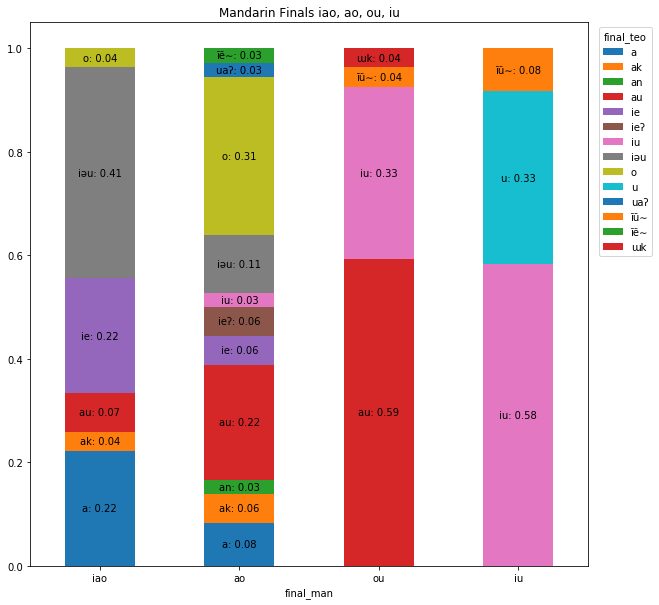

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

nms.plot(kind="bar", stacked=True, rot=0, ax=ax1, figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='final_teo')
plt.title('Mandarin Finals iao, ao, ou, iu')
df = nms
labels = []
for j in df.columns:
    for i in df.index:
        if not np.isnan(df.loc[i][j]): 
            label = str(j)+": " + str(round(df.loc[i][j], 2))
        else: 
            label = ""
        labels.append(label)

patches = ax1.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax1.text(x + width/2., y + height/2., label, ha='center', va='center')

In [9]:
if allow_tone_plot: # draw plots for tones
    freq_df = reduced_df[['citation_man', 'citation_teo']]
    freq_df = freq_df.groupby(['citation_man'])['citation_teo'].value_counts().unstack()
    pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)

    #nms1 = pct_df.loc[['iang', 'uan', 'uang'], :].dropna(thresh=1, axis=1)
    nms1 = pct_df.loc[[1], :].dropna(thresh=1, axis=1)
    nms2 = pct_df.loc[[2], :].dropna(thresh=1, axis=1)
    nms3 = pct_df.loc[[3], :].dropna(thresh=1, axis=1)
    nms4 = pct_df.loc[[4], :].dropna(thresh=1, axis=1)
    nms1[nms1.notnull()]

    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    nms1.plot(kind="bar", stacked=False, rot=0, ax=ax1, figsize=(10, 10))
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    for i, p in enumerate(ax1.patches):
        ax1.annotate(current_labels[i], (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='citation_teo')
    plt.title('Mandarin First Tone and Corresponding Teochew')
    plt.tight_layout()

    ax2 = fig.add_subplot(222)
    nms2.plot(kind="bar", stacked=False, rot=0, ax=ax2, figsize=(10, 10))
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    for i, p in enumerate(ax2.patches):
        ax2.annotate(current_labels[i], (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='citation_teo')
    plt.title('Mandarin Second Tone and Corresponding Teochew')
    plt.tight_layout()

    ax3 = fig.add_subplot(223)
    nms3.plot(kind="bar", stacked=False, rot=0, ax=ax3, figsize=(10, 10))
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    for i, p in enumerate(ax3.patches):
        ax3.annotate(current_labels[i], (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='citation_teo')
    plt.title('Mandarin Third Tone and Corresponding Teochew')
    plt.tight_layout()

    ax4 = fig.add_subplot(224)
    nms4.plot(kind="bar", stacked=False, rot=0, ax=ax4, figsize=(10, 10))
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    for i, p in enumerate(ax4.patches):
        ax4.annotate(current_labels[i], (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='citation_teo')
    plt.title('Mandarin Fourth Tone and Corresponding Teochew')
    plt.tight_layout()